In [2]:
#Learn Code from 
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
#Author: Jason Brownlee

#import library
import pandas as pd
import numpy as np
import math
import utils
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [4]:
df_data_set = pd.read_csv('Data/shcmp multi variable.csv')
df_data_set.set_index('Date',inplace=True)
df_data_set.head(5)
len(df_data_set)

4410

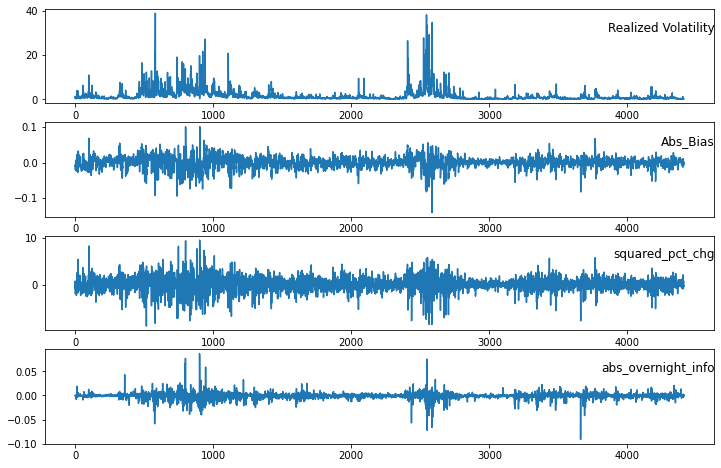

In [5]:
# plot each column
Variables = df_data_set.columns
plt.figure(figsize=(12,8))
for group in range(len(Variables)):
 plt.subplot(len(Variables), 1, group+1)
 plt.plot(df_data_set.values[:, group])
 plt.title(df_data_set.columns[group], y=0.7, loc='right')
plt.show()

In [6]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
#Set Windows size here
WINDOWS_SIZE = 20
X,y = df_to_X_y3(df_data_set, window_size = WINDOWS_SIZE)

X.shape,y.shape

((4390, 20, 4), (4390,))

In [8]:
#Convert the data into training set, validation set and test set
#The number percentage of each set is 80%, 10% and 10%

#OR CUSTOMIZE YOUR PERCENTAGE OF EACH SET HERE
TRAINING_DATA_LEN = math.ceil(len(X)*0.8)
VALIDATION_LEN = math.ceil(len(X)*0.9)

X_train, y_train, X_val, y_val, X_test, y_test = utils.split_to_training_val_test(X,y,\
    training_len=TRAINING_DATA_LEN, val_len=VALIDATION_LEN)

#check size of each set
X_train.shape, X_test.shape, X_val.shape,y_test.shape,y_train.shape,y_test.shape

((3512, 20, 4), (439, 20, 4), (439, 20, 4), (439,), (3512,), (439,))

In [13]:
#built model_multi for multi variate LSTM
model_multi = Sequential()
model_multi.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model_multi.add(LSTM(64, dropout=0.4))
model_multi.add(Dense(1, 'linear'))

model_multi.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [14]:
cp = ModelCheckpoint('model_multi/', save_best_only=True)
model_multi.compile(loss=MeanSquaredError(), \
              optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [15]:
#Set Epoch here
EPOCH = 30

#Start to train model
history = model_multi.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, callbacks=[cp])

Epoch 1/30
110/110 [==============================] - 3s 12ms/step - loss: 5.1953 - root_mean_squared_error: 2.2793 - val_loss: 0.3155 - val_root_mean_squared_error: 0.5617


INFO:tensorflow:Assets written to: model_multi\assets


INFO:tensorflow:Assets written to: model_multi\assets


Epoch 2/30
110/110 [==============================] - 1s 10ms/step - loss: 4.4575 - root_mean_squared_error: 2.1113 - val_loss: 0.3579 - val_root_mean_squared_error: 0.5983
Epoch 3/30
110/110 [==============================] - 1s 9ms/step - loss: 4.4868 - root_mean_squared_error: 2.1182 - val_loss: 0.3145 - val_root_mean_squared_error: 0.5608


INFO:tensorflow:Assets written to: model_multi\assets


INFO:tensorflow:Assets written to: model_multi\assets


Epoch 4/30
110/110 [==============================] - 1s 13ms/step - loss: 4.3755 - root_mean_squared_error: 2.0918 - val_loss: 0.3023 - val_root_mean_squared_error: 0.5498


INFO:tensorflow:Assets written to: model_multi\assets


INFO:tensorflow:Assets written to: model_multi\assets


Epoch 5/30
110/110 [==============================] - 1s 12ms/step - loss: 4.2493 - root_mean_squared_error: 2.0614 - val_loss: 0.3101 - val_root_mean_squared_error: 0.5569
Epoch 6/30
110/110 [==============================] - 1s 9ms/step - loss: 4.0234 - root_mean_squared_error: 2.0058 - val_loss: 0.3854 - val_root_mean_squared_error: 0.6208
Epoch 7/30
110/110 [==============================] - 1s 9ms/step - loss: 4.0011 - root_mean_squared_error: 2.0003 - val_loss: 0.3051 - val_root_mean_squared_error: 0.5523
Epoch 8/30
110/110 [==============================] - 1s 9ms/step - loss: 4.1806 - root_mean_squared_error: 2.0446 - val_loss: 0.3289 - val_root_mean_squared_error: 0.5735
Epoch 9/30
110/110 [==============================] - 1s 10ms/step - loss: 4.0437 - root_mean_squared_error: 2.0109 - val_loss: 0.3091 - val_root_mean_squared_error: 0.5560
Epoch 10/30
110/110 [==============================] - 1s 9ms/step - loss: 4.0047 - root_mean_squared_error: 2.0012 - val_loss: 0.3158 - v

INFO:tensorflow:Assets written to: model_multi\assets


INFO:tensorflow:Assets written to: model_multi\assets


Epoch 17/30
110/110 [==============================] - 2s 18ms/step - loss: 3.8398 - root_mean_squared_error: 1.9595 - val_loss: 0.3636 - val_root_mean_squared_error: 0.6030
Epoch 18/30
110/110 [==============================] - 2s 16ms/step - loss: 3.7670 - root_mean_squared_error: 1.9409 - val_loss: 0.3271 - val_root_mean_squared_error: 0.5719
Epoch 19/30
110/110 [==============================] - 2s 17ms/step - loss: 3.6303 - root_mean_squared_error: 1.9053 - val_loss: 0.3927 - val_root_mean_squared_error: 0.6267
Epoch 20/30
110/110 [==============================] - 2s 16ms/step - loss: 4.0203 - root_mean_squared_error: 2.0051 - val_loss: 0.3548 - val_root_mean_squared_error: 0.5956
Epoch 21/30
110/110 [==============================] - 2s 16ms/step - loss: 3.8083 - root_mean_squared_error: 1.9515 - val_loss: 0.3189 - val_root_mean_squared_error: 0.5647
Epoch 22/30
110/110 [==============================] - 2s 16ms/step - loss: 3.6723 - root_mean_squared_error: 1.9163 - val_loss: 0

INFO:tensorflow:Assets written to: model_multi\assets


INFO:tensorflow:Assets written to: model_multi\assets


Epoch 24/30
110/110 [==============================] - 2s 18ms/step - loss: 3.6178 - root_mean_squared_error: 1.9020 - val_loss: 0.3437 - val_root_mean_squared_error: 0.5863
Epoch 25/30
110/110 [==============================] - 2s 18ms/step - loss: 3.5297 - root_mean_squared_error: 1.8788 - val_loss: 0.2959 - val_root_mean_squared_error: 0.5439
Epoch 26/30
110/110 [==============================] - 2s 16ms/step - loss: 3.9850 - root_mean_squared_error: 1.9963 - val_loss: 0.3116 - val_root_mean_squared_error: 0.5582
Epoch 27/30
110/110 [==============================] - 2s 17ms/step - loss: 3.5530 - root_mean_squared_error: 1.8849 - val_loss: 0.3029 - val_root_mean_squared_error: 0.5504
Epoch 28/30
110/110 [==============================] - 2s 17ms/step - loss: 3.7544 - root_mean_squared_error: 1.9376 - val_loss: 0.3296 - val_root_mean_squared_error: 0.5741
Epoch 29/30
110/110 [==============================] - 2s 17ms/step - loss: 3.7842 - root_mean_squared_error: 1.9453 - val_loss: 0

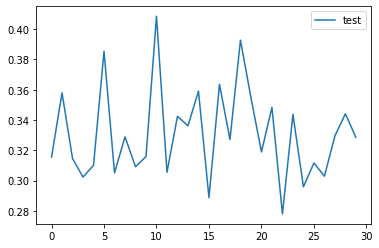

0.2779944837093353

In [16]:
# plot history
#plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

min(history.history['val_loss'])

In [17]:
from tensorflow.keras.models import load_model
#check result for training set
model1 = load_model('model_multi/')
train_predictions = model1.predict(X_test).flatten()

In [18]:
train_results = pd.read_csv('Data/date.csv')
train_results['Date'] = pd.to_datetime(train_results['Date'])
train_results.set_index('Date',inplace=True)

train_results['Train Predictions'] = train_predictions

In [19]:
train_results.head(5)

,Realized Volatility,Train Predictions
Date,,
2021-05-11,0.794308,0.412791
2021-05-12,0.480160,0.403869
2021-05-13,0.647137,0.396671
2021-05-14,0.489060,0.367565
2021-05-17,0.423597,0.359237


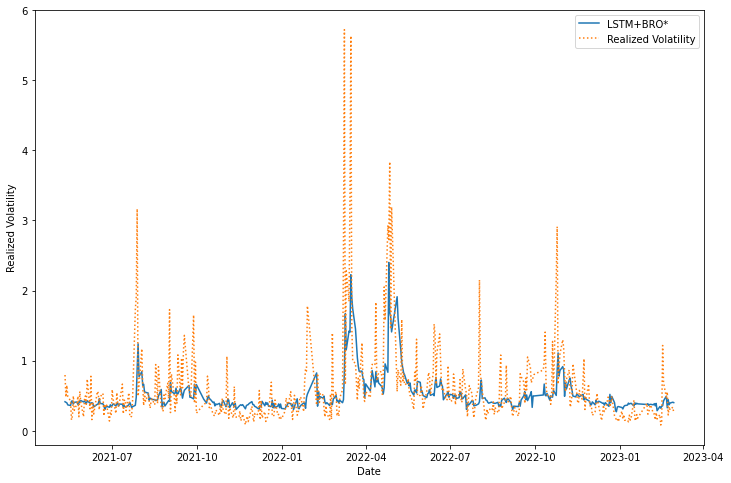

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train_results['Train Predictions'], label='LSTM+BRO*')
plt.plot(train_results['Realized Volatility'], label='Realized Volatility',linestyle=':')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.show()

In [21]:
#show error
Predictions_val = train_results['Train Predictions']
Actual_val = train_results['Realized Volatility']

utils.Predictions_Error(Predictions_val,Actual_val)

MAE =  0.26591778696766327
MSE =  0.26032711036592665
RMSE =  0.5102226086385497
R_2 =  0.29876598542177046
RMSPE =  0.6615507320992461
MSLE =  0.04621740834233722
